In [150]:
from glob import glob
from os.path import splitext,join
from glob import glob

from numpy import *
import numpy as np
from numpy.random import rand
from scipy.stats import linregress
from numpy.linalg import norm

import MDAnalysis
import MDAnalysis.analysis.hbonds
import MDAnalysis.analysis.distances

from matplotlib.pyplot import *
from matplotlib.cm import *
%matplotlib inline

In [2]:
data = {'0.1':[None],'-0.1':[None],
        '1.0':[None,None,None],'-1.0':[None,None,None],
        '0.2':[None,None,None,None,None,None],'-0.2':[None,None,None,None,None,None]}

plus100,minus100 = [],[]
plus200,minus200 = [],[]
plus1000,minus1000 = [],[]
allmV = []

for i,file_path in enumerate(glob('./md-electric-field-data/*/*/*q.out')):
    data = genfromtxt(file_path,dtype=float)
    
    x,y,z,w = data.T
    
    if i < 6 :
        y /= 0.2
        z /= 0.2
        w /= 0.2
        
        data = array([x,y,z,w]).T
        plus200 += [data]

    elif i < 12 :
        y /= 0.2
        z /= 0.2
        w /= 0.2

        data = array([x,y,z,w]).T
        minus200 += [data]
    elif i == 12 :
        y /= 0.1
        z /= 0.1
        w /= 0.1
        
        data = array([x,y,z,w]).T
        minus100 += [data]
    elif i == 13 :
        y /= 0.1
        z /= 0.1
        w /= 0.1

        data = array([x,y,z,w]).T
        plus100 += [data]
    elif i < 17 :
        plus1000 += [data]
    else :
        y /= 1.0
        z /= 1.0
        w /= 1.0

        minus1000 += [data]
        
    allmV += [data]
    
#     _,_,_,param,traj = file_path.split('/')
#     i = int(splitext(traj)[0][0])-1
    
#     if param[:param.index('-')] == 'plus': v = float(param[param.index('-')+1:-2])/1000
#     else : v = -float(param[param.index('-')+1:-2])/1000
  
    
#     data[str(v)][i] = frame,current,voltage,x


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


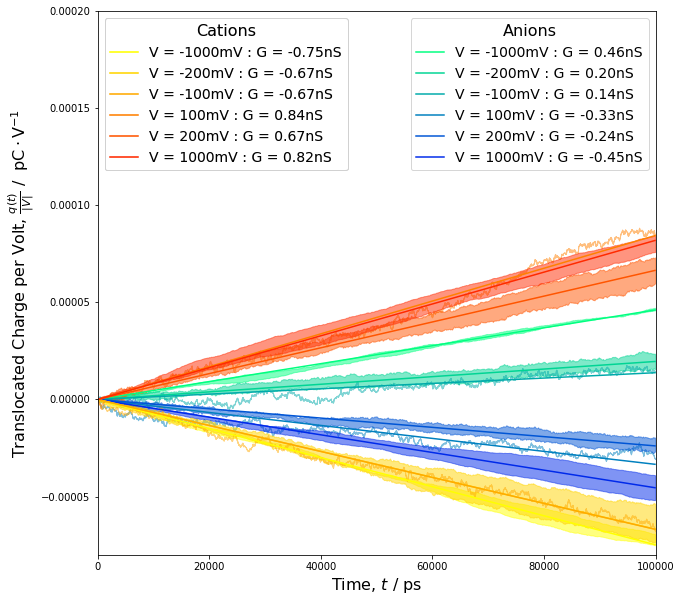

In [3]:
figure(figsize=(10,10))
label = [ '-1000mV','-200mV','-100mV','100mV','200mV','1000mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 6*[None]
pline  = 6*[None]

for j,datum in enumerate([minus1000,minus200,minus100,plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    slope, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
    slope = slope[0]
    
    nline[j], = plot(x,x*slope,color=winter(i),label='V = '+label[j]+' : G = {0:.2f}nS'.format(slope*1e9))

    #plot(x,y,color=winter(i))
    fill_between(x,y1=y+dy, y2=y-dy,alpha=0.5,color=winter(i))
    
for j,datum in enumerate([minus1000,minus200,minus100,plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    slope, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y)
    slope = slope[0]
    
    pline[j], = plot(x,x*slope,color=autumn(i),label='V = '+label[j]+' : G = {0:.2f}nS'.format(slope*1e9))

    #plot(x,y,color=winter(i))
    fill_between(x,y1=y+dy, y2=y-dy,alpha=0.5,color=autumn(i))

legend1 = legend(handles=nline,fontsize=14,loc=1)
legend1.set_title('Anions',prop={'size':16})
gca().add_artist(legend1)

legend2 = legend(handles=pline,fontsize=14,loc=2)
legend2.set_title('Cations',prop={'size':16})
gca().add_artist(legend2)

    
    
xlabel(r'Time, $t$ / $\mathrm{ps}$',fontsize=16)
ylabel(r'Translocated Charge per Volt, $\frac{q(t)}{|V|}$ /  $\mathrm{pC\cdot V^{-1}}$',fontsize=16);
xlim(0,1e5); ylim(-8e-5,20e-5);

In [72]:
glob(join(data_path,'*-struct/struct.gro'))

['./umbrella-sampling-data/helix1_pulling_umbrella/17-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/22-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/05-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/04-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/21-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/14-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/10-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/12-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/24-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/16-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/20-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/13-struct/struct.gro',
 './umbrella-sampling-data/helix1_pulling_umbrella/11-struct/struct.gro',
 './umbrella-sampling-data/helix1_pull

In [51]:
data_path = './umbrella-sampling-data/helix1_pulling_umbrella/'
H = []

for i in range(4,26):
    mol_path = join(data_path,str(i).zfill(2)+'-struct')
    
    u = MDAnalysis.Universe(
            join(mol_path,'umbrella.gro'),
            join(mol_path,'umbrella.xtc'))

    h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u,'protein','protein', distance=3.0)
    nterm = u.select_atoms('name N')[0]
    cterm = u.select_atoms('name C')[-1]
    
    z = sqrt(sum((cterm.position - nterm.position)**2))
    
    h.run(); H += [h]

# t,c = array([ array([t,c]) for t,c in h.count_by_time() ]).T
# plot(t,c)

HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]
HBonds frame  5000:  5001/5001 [100.0%]


IOError: [Errno 2] No such file or directory: './umbrella-sampling-data/helix1_pulling_umbrella/20-struct/umbrella.gro'

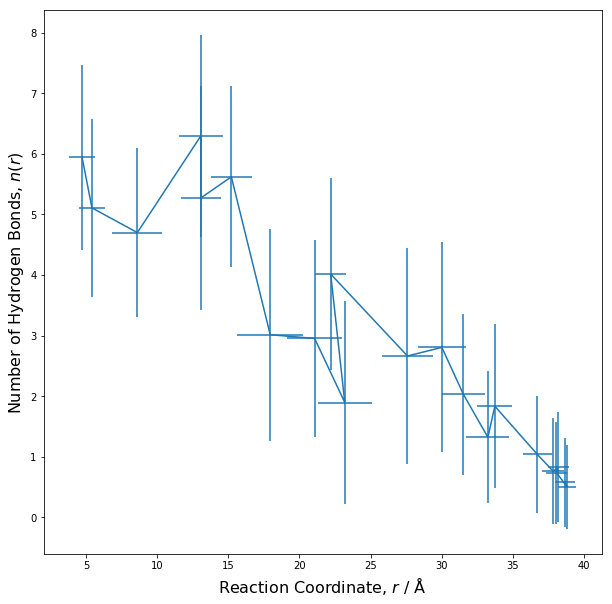

In [280]:
figure(figsize=(10,10))
errorbar(mean(Z,axis=1),mean(x,axis=1),yerr=std(x,axis=1),xerr=std(Z,axis=1),fillstyle='full')
#fill_between(mean(Z,axis=1),y1=mu+sigma,y2=mu-sigma,alpha=0.5)
#plot(Z.T,x.T,'b.',alpha=0.01)

# mu = mean(y,axis=1)
# sigma = std(y,axis=1)
# r = linspace(0,40,16)

# plot(r,mu)
# fill_between(r,y1=mu+sigma,y2=mu-sigma,alpha=0.5)


xlabel(r'Reaction Coordinate, $r$ / $\mathrm{\AA}$',fontsize=16)
ylabel(r'Number of Hydrogen Bonds, $n(r)$',fontsize=16);

(0, 40)

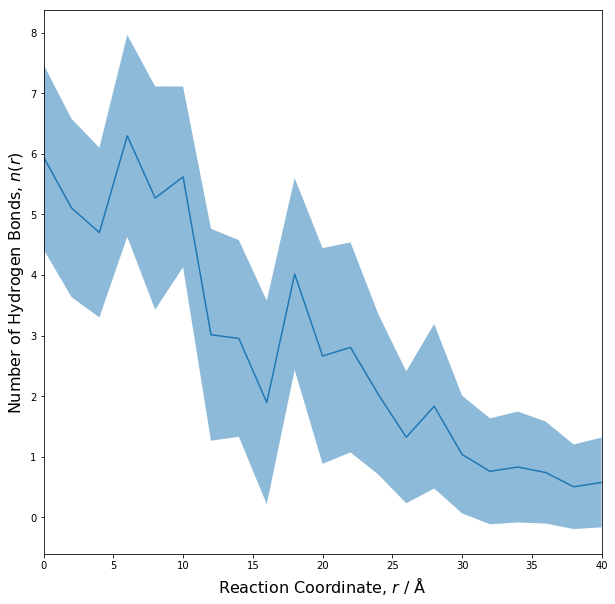

In [100]:
mu = mean(x,axis=1)
sigma = std(x,axis=1)
r = linspace(0,40,21)

figure(figsize=(10,10))
plot(r,mu)
fill_between(r,y1=mu+sigma,y2=mu-sigma,alpha=0.5)

xlabel(r'Reaction Coordinate, $r$ / $\mathrm{\AA}$',fontsize=16)
ylabel(r'Number of Hydrogen Bonds, $n(r)$',fontsize=16);
xlim(0,40)

In [319]:
X = []; H = []
for i in range(4,26):
    x = []
    
    mol_path = join('./umbrella-sampling-data/helix1_pulling_umbrella',str(i).zfill(2)+'-struct')
    print mol_path

    u = MDAnalysis.Universe(
            join(mol_path,'struct.gro'),
            join(mol_path,'umbrella.xtc'))

    h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u,'protein','protein', distance=3.0)
    h.run(); H += [h]
    
    for t in u.trajectory :

        nterm = u.select_atoms('name N and resid 1')
        cterm = u.select_atoms('name C and resid 12')
        dist = MDAnalysis.analysis.distances.dist(nterm,cterm,box=u.dimensions)[-1,0]

        x+= [ dist ]
    X += [x]
    
Y = array([ array([ c for t,c in h.count_by_time() ]).T for h in H ])

./umbrella-sampling-data/helix1_pulling_umbrella/04-struct


HBonds frame  5000:  5001/5001 [100.0%]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [297]:
xerr.shape

(21,)

In [ ]:
x2 = mean(array(X),axis=1)
y2 = mean(array(Y),axis=1)

# Dummy errors (above and below)
xerr2 = std(array(X),axis=1)
yerr2 = std(array(Y),axis=1)

def make_error_boxes(ax, xdata, ydata, xerror, yerror,
                     edgecolor='None', alpha=0.5):

    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe, y - ye), 2*xe, 2*ye)
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None')

    return artists


# Create figure and axes
fig, ax = plt.subplots(1,figsize=(10,10))

# Call function to create error boxes
_ = make_error_boxes(ax, x1, y1, xerr1, yerr1)
_ = make_error_boxes(ax, x2, y2, xerr2, yerr2)

xlabel(r'Reaction Coordinate, $r$ / $\mathrm{\AA}$',fontsize=16)
ylabel(r'Number of Hydrogen Bonds, $n(r)$',fontsize=16);